In [50]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

In [110]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

d2 =pd.read_csv(url , sep = ';')
d2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [112]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [113]:
x = d2.loc[:,'fixed acidity':'alcohol']
y = d2['quality']
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [114]:
from sklearn.preprocessing import StandardScaler

df_normalized = preprocessing.normalize(x, norm='l2')
df_normalized

array([[0.19515252, 0.01846037, 0.        , ..., 0.09256559, 0.0147683 ,
        0.24789644],
       [0.10724124, 0.01209901, 0.        , ..., 0.04399641, 0.00934924,
        0.134739  ],
       [0.13545665, 0.01319834, 0.00069465, ..., 0.05661393, 0.01128805,
        0.17018912],
       ...,
       [0.12306863, 0.0099627 , 0.00253951, ..., 0.06680869, 0.01465103,
        0.21488174],
       [0.10566885, 0.01155193, 0.0021492 , ..., 0.06393861, 0.01271608,
        0.18268174],
       [0.12589937, 0.0065048 , 0.00986212, ..., 0.07113314, 0.01384893,
        0.2308155 ]])

In [115]:
covar_matrix = PCA(n_components = 11)
results = covar_matrix.fit(df_normalized)
variance = results.explained_variance_ratio_
variance


array([7.46491797e-01, 1.94900498e-01, 2.88345039e-02, 1.52566094e-02,
       1.22698846e-02, 1.51401580e-03, 4.18814235e-04, 1.79068809e-04,
       1.11139078e-04, 1.72656461e-05, 6.40290799e-06])

In [116]:
var=np.cumsum(np.round(variance, decimals=3)*100)
var

array([74.6, 94.1, 97. , 98.5, 99.7, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

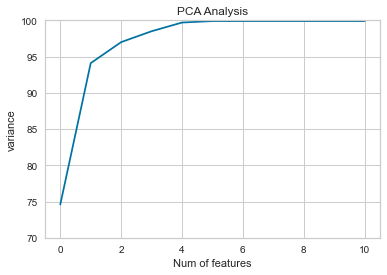

In [117]:


plt.ylabel("variance")
plt.xlabel("Num of features")
plt.title("PCA Analysis")
plt.ylim(70,100.0)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [118]:
results.components_

array([[ 5.27264108e-01,  2.86277392e-02,  1.91612793e-02,
         1.42260532e-01,  4.72113589e-03, -3.45179358e-02,
        -4.85870949e-01,  5.80649486e-02,  1.91095075e-01,
         3.62242604e-02,  6.49678675e-01],
       [-1.35449065e-01, -1.66479100e-03, -1.11191957e-02,
        -3.19134122e-02, -1.24756168e-03,  9.58586933e-01,
        -2.47653423e-01, -4.54330085e-03, -7.27834056e-03,
        -3.12896779e-03, -1.42333419e-02],
       [ 8.11497897e-01, -4.24910324e-02,  6.71756293e-02,
        -7.66820277e-02,  1.10808736e-03,  1.22780907e-01,
         7.39015128e-02, -2.14421647e-02, -1.41359537e-01,
         4.93308089e-03, -5.36906457e-01],
       [-1.62475224e-01, -3.50809816e-02,  2.15418509e-02,
         6.24951696e-01, -2.68620810e-03, -1.64095373e-01,
        -5.97806332e-01, -4.93825337e-02, -1.83055507e-01,
        -3.98958779e-02, -3.99369379e-01],
       [ 1.10837549e-01,  3.71146238e-02, -1.06146088e-02,
         7.62933327e-01,  5.64313926e-03,  1.93350638e-01,
  

In [119]:
pca = PCA(n_components=3)
pca.fit(x)


PCA(n_components=3)

In [120]:
pca_ds = pd.DataFrame(pca.fit_transform(x), columns=(["col1","col2", "col3"]))
pca_ds

,col1,col2,col3
0,-13.224905,-2.023900,-1.126821
1,22.037724,4.408322,-0.310378
2,7.162673,-2.501461,-0.581868
3,13.430063,-1.951122,2.634040
4,-13.224905,-2.023900,-1.126821
...,...,...,...
1594,1.129111,16.313102,-1.860069
1595,9.489984,21.627525,-1.986558
1596,-3.431354,14.271243,-1.750719
1597,1.132878,16.316167,-2.134414


In [121]:
dnormalized = preprocessing.normalize(pca_ds, norm='l2')
dnormalized =  pd.DataFrame(dnormalized ,  columns=["x","y","z"])
dnormalized

,x,y,z
0,-0.985004,-0.150742,-0.083927
1,0.980481,0.196131,-0.013809
2,0.941319,-0.328742,-0.076469
3,0.971481,-0.141137,0.190537
4,-0.985004,-0.150742,-0.083927
...,...,...,...
1594,0.068607,0.991221,-0.113022
1595,0.400398,0.912500,-0.083816
1596,-0.232130,0.965447,-0.118436
1597,0.068684,0.989210,-0.129404


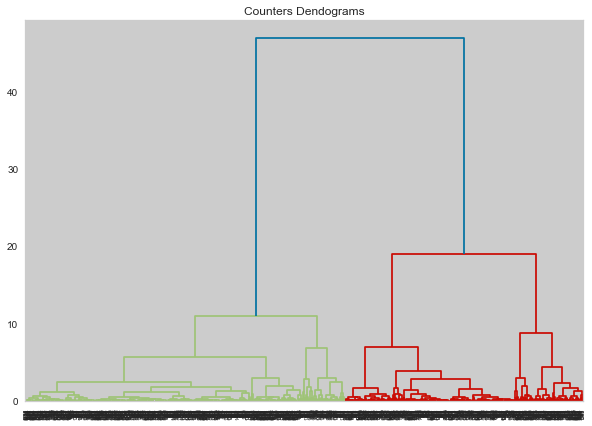

In [122]:
import scipy.cluster.hierarchy as shc
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= dnormalized , method='ward',metric='euclidean')) #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

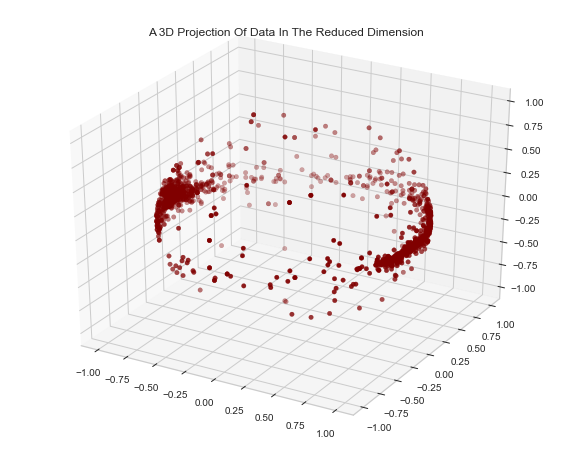

In [124]:
#A 3D Projection Of Data In The Reduced Dimension
x =dnormalized["x"]
y =dnormalized["y"]
z =dnormalized["z"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

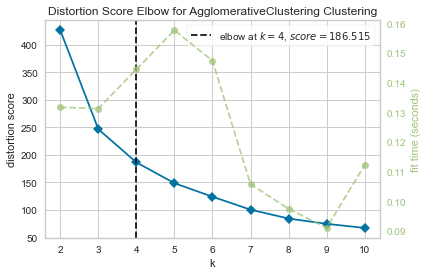

In [157]:
hac_ = AgglomerativeClustering(3)

visualizer1 = KElbowVisualizer(hac_)
visualizer1.fit(dnormalized[["x","y","z"]])        
visualizer1.show() 

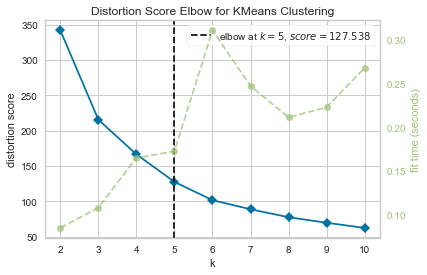

In [169]:
KM_ = KMeans(3)

visualizer1 = KElbowVisualizer(KM_)
visualizer1.fit(dnormalized[["x","y","z"]])       
visualizer1.show() 

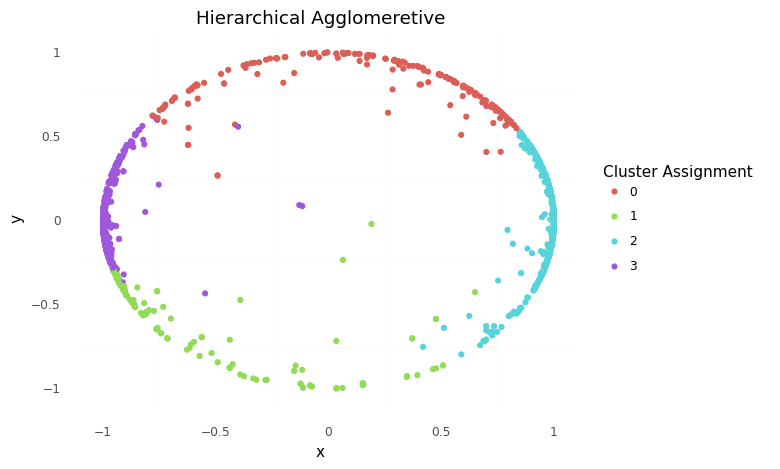

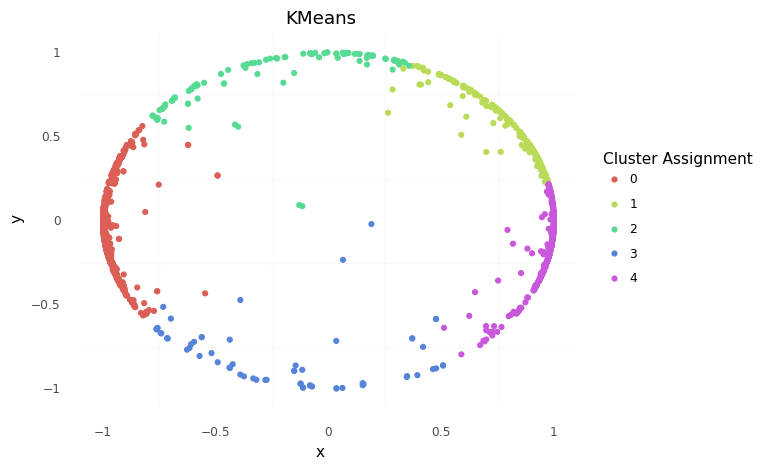

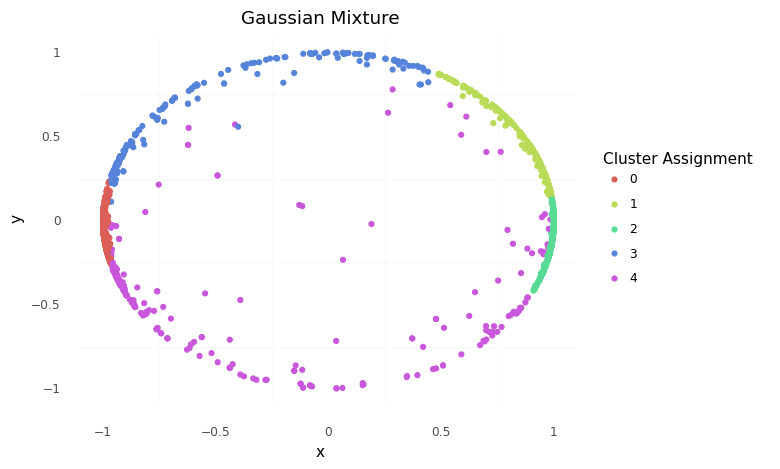

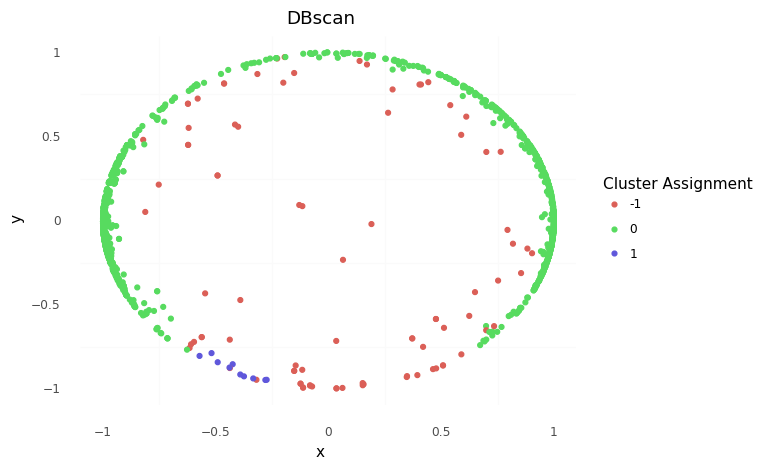

In [167]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac6 = AgglomerativeClustering(4)
km6= KMeans(5)
db6 = DBSCAN(eps=0.2, min_samples=10)
gm6 = GaussianMixture(5)

db6.fit(dnormalized[["x","y","z"]])
hac6.fit(dnormalized[["x","y","z"]])
km6.fit(dnormalized[["x","y","z"]])
gm6.fit(dnormalized[["x","y","z"]])

dnormalized["hac"] = hac6.labels_
dnormalized["km"] = km6.labels_
dnormalized["DBscan"] = db6.labels_
dnormalized["gm"] = gm6.predict(dnormalized[["x","y","z"]])

print(ggplot(dnormalized, aes(x = "x", y = "y",z="z",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(dnormalized, aes(x = "x", y = "y",z="z",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(dnormalized, aes(x = "x", y = "y",z="z",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixture"))

print(ggplot(dnormalized, aes(x = "x", y = "y",z="z",
                    color = "factor(DBscan)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBscan"))


In [168]:
print("hac : ",silhouette_score(dnormalized, dnormalized["hac"]))
print("km : ",silhouette_score(dnormalized, dnormalized["km"]))
print("gm : ",silhouette_score(dnormalized, dnormalized["gm"]))
print("DBscan : ",silhouette_score(dnormalized, dnormalized["DBscan"]))

hac :  0.6051780953616154
km :  0.6002476855146208
gm :  0.6592821883433698
DBscan :  0.2133013302668223
